Pandas

"80% of a data scientists valuable time is spent simply finding, cleaning, and organizing data, leaving only 20% to actually perform analysis"  ----IBM Data Analytics

pandas 0.23.4 documentation 

1. DataFrame - slice data by row and column - groupby
2. Creating data sets and data frames - Reading from CSV - Exporting to CSV - Finding maximums - Plotting data
3. Data cleanling -NAs missing values


In [50]:
#Import libraries pd np os matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot
import os

1. DataFrame and slice data by row and column

In [3]:
# Our small data set as data 0,1,2,3,4,5,6,7,8,9
data = [0,1,2,3,4,5,6,7,8,9]
# Create dataframe by pd.DataFrame
df = pd.DataFrame (data)
df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [4]:
# Lets change the name of the df.columns as 'Rev'
df.columns = ['Rev']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [6]:
# Lets add a column 'NewCol' = 5
df['NewCol'] = 5
df

,Rev,NewCol
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
5,5,5
6,6,5
7,7,5
8,8,5
9,9,5


In [12]:
# Lets add and modify our new column +1 np.log10(data+1) single cell seq
df['ln_Rev']=np.log10(df['Rev'] +1 )
df

,Rev,NewCol,ln_Rev
0,0,5,0.000000
1,1,5,0.301030
2,2,5,0.477121
3,3,5,0.602060
4,4,5,0.698970
5,5,5,0.778151
6,6,5,0.845098
7,7,5,0.903090
8,8,5,0.954243
9,9,5,1.000000


In [25]:
df['NewCol']

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
Name: NewCol, dtype: int64

In [14]:
# Lets add a couple of columns: 'test' = 3, 'col' = 'Rev'
df['test'] = 3
df['col'] = df['Rev']
df

,Rev,NewCol,ln_Rev,test,col
0,0,5,0.000000,3,0
1,1,5,0.301030,3,1
2,2,5,0.477121,3,2
3,3,5,0.602060,3,3
4,4,5,0.698970,3,4
5,5,5,0.778151,3,5
6,6,5,0.845098,3,6
7,7,5,0.903090,3,7
8,8,5,0.954243,3,8
9,9,5,1.000000,3,9


In [15]:
# Create group object  New, .groupby()
New = df.groupby(df['NewCol'])
# Apply sum function  sum()
New.sum()

,Rev,NewCol,ln_Rev,test,col
NewCol,,,,,
5,45,50,6.559763,30,45


In [18]:
# Create group object New and test and Newtest d.groupby 
Newtest = df.groupby(['NewCol','test'])
# Apply sum function sum()
Newtest.sum()

,,Rev,ln_Rev,col
NewCol,test,,,
5,3,45,6.559763,45


In [19]:
# Create group object  , and test and Newtest, Newtest d.groupby, as_index=False
Newtest = df.groupby(['NewCol','test'], as_index=False)

# Apply sum function sum()
Newtest.sum()

,NewCol,test,Rev,ln_Rev,col
0,5,3,45,6.559763,45


Select dataframe

In [21]:
# If we wanted, we could change the name of the index: i ='a','b','c','d','e','f','g','h','i','j'
# df.index
i = ['a','b','c','d','e','f','g','h','i','j']
df.index= i
df

,Rev,NewCol,ln_Rev,test,col
a,0,5,0.000000,3,0
b,1,5,0.301030,3,1
c,2,5,0.477121,3,2
d,3,5,0.602060,3,3
e,4,5,0.698970,3,4
f,5,5,0.778151,3,5
g,6,5,0.845098,3,6
h,7,5,0.903090,3,7
i,8,5,0.954243,3,8
j,9,5,1.000000,3,9


In [23]:
#select dataframe by row names .loc ['':'']
df.loc['a':'b']

,Rev,NewCol,ln_Rev,test,col
a,0,5,0.00000,3,0
b,1,5,0.30103,3,1


In [27]:
#select dataframe by row numbers .loc[]
df.iloc[0:2]

,Rev,NewCol,ln_Rev,test,col
a,0,5,0.00000,3,0
b,1,5,0.30103,3,1


In [26]:
# df.iloc[inclusive:exclusive] 
# Note: .iloc is strictly integer position based.  
df.iloc[0:2]

,Rev,NewCol,ln_Rev,test,col
a,0,5,0.00000,3,0
b,1,5,0.30103,3,1


In [29]:
#select data frame by column name. slice 'Rev' out as a list 
#['Rev']
df['Rev']

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: Rev, dtype: int64

In [30]:
#select data frame by column name. slice 'Rev' out as a table with double brackets
#[['Rev']]
df[['Rev']]

,Rev
a,0
b,1
c,2
d,3
e,4
f,5
g,6
h,7
i,8
j,9


In [32]:
#select data frame by column name   multi-selection [['Rev','col']] 
df[['Rev','col']] 

,Rev,col
a,0,0
b,1,1
c,2,2
d,3,3
e,4,4
f,5,5
g,6,6
h,7,7
i,8,8
j,9,9


In [34]:
#select data frame by row and column .iloc
df.iloc[0:2,0:3]

,Rev,NewCol,ln_Rev
a,0,5,0.00000
b,1,5,0.30103


In [35]:
#transpose data.T
transpose = df.T
transpose

,a,b,c,d,e,f,g,h,i,j
Rev,0.0,1.00000,2.000000,3.00000,4.00000,5.000000,6.000000,7.00000,8.000000,9.0
NewCol,5.0,5.00000,5.000000,5.00000,5.00000,5.000000,5.000000,5.00000,5.000000,5.0
ln_Rev,0.0,0.30103,0.477121,0.60206,0.69897,0.778151,0.845098,0.90309,0.954243,1.0
test,3.0,3.00000,3.000000,3.00000,3.00000,3.000000,3.000000,3.00000,3.000000,3.0
col,0.0,1.00000,2.000000,3.00000,4.00000,5.000000,6.000000,7.00000,8.000000,9.0


2.Creating data sets and data frames - Reading from CSV - Exporting to CSV - Finding maximums - Plotting data

In [37]:
# Create Data name and birhts number 
#names  'Bob','Jessica','Mary','John','Mel'
#births  968, 155, 77, 578, 973
names= ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

In [38]:
# zip two list together
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [40]:
# change the list to pd.ataFrame with data and columns names 
#pd.DataFrame(data = , columns=['', ''])
df= pd.DataFrame(data =BabyDataSet , columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Export data

In [45]:
# write df as births1880.csv file. 
#df.to_csv('data', index = False, header False)
df.to_csv('births1880.csv', index = False, header= False)

Get data

In [49]:
# how to know your working directory: os.getcwd()
import os
os.getcwd()

'C:\\Users\\liuj16\\Downloads'

In [55]:
# set up working directory 
#with births1880.csv file name as loca 
loca = 'C:\\Users\\liuj16\\Downloads\\births1880.csv'
#pd.read_csv
df= pd.read_csv(loca)
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [56]:
# read loca again with header = None
df= pd.read_csv(loca, header = None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [57]:
# read loca again with columns' name, names = ('Name', 'Births')
df= pd.read_csv(loca, names = ('Name', 'Births'))
df

,Name,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Understand your Data

In [60]:
#Check data type .dtypes
df.dtypes

Name      object
Births     int64
dtype: object

In [61]:
#Check columns type .dtypes
df['Births'].dtypes

dtype('int64')

In [62]:
#Check data head .head()
df.head()

,Name,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [63]:
#Check data head first row of the df.head
df.head(1)

,Name,Births
0,Bob,968


In [65]:
#Check the data tail .tail
df.tail()

,Name,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [66]:
# number of the rows and the columns .shape
df.shape

(5, 2)

In [67]:
#Get the column name .columns
df.columns

Index(['Name', 'Births'], dtype='object')

In [70]:
#Get the maximum value of column 'Births' .max()
df['Births'].max()

973

In [86]:
#let's add another column 'Alives'
df['Alives']=df['Births']*0.8
df

,Name,Births,Alives
0,Bob,968,774.4
1,Jessica,155,124.0
2,Mary,77,61.6
3,John,578,462.4
4,Mel,973,778.4


Present Data

In [98]:
df['Name']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Name, dtype: object

The most popular name


[Text(0,0.5,'Births'), Text(0.5,0,'Name')]

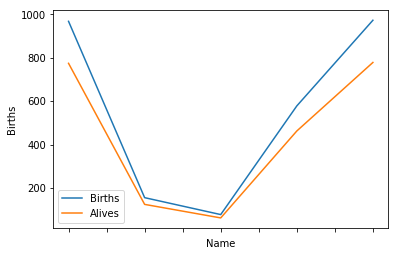

In [105]:
# Create graph df['',''].plot.box()  print("The most popular name")
ax= df.plot(x='Name')
print("The most popular name")
ax.set(xlabel="Name", ylabel="Births")


In [75]:
# Create a dataframe with dates as your index
#  States 'NY', 'NY', 'NY', 'NY', 'FL', 'FL', 'GA', 'GA', 'FL', 'FL' 

#  data 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10 

#df1 DataFrame data and columns=['Revenue']


,Revenue,State
0,1.0,NY
1,2.0,NY
2,3.0,NY
3,4.0,NY
4,5.0,FL
5,6.0,FL
6,7.0,GA
7,8.0,GA
8,9.0,FL
9,10.0,FL


In [76]:
# Create a second dataframe
#data2 10.0, 10.0, 9, 9, 8, 8, 7, 7, 6, 6

# df2 DataFrame with data2 and columns=['Revenue']


,Revenue,State
0,10.0,NY
1,10.0,NY
2,9.0,NY
3,9.0,NY
4,8.0,FL
5,8.0,FL
6,7.0,GA
7,7.0,GA
8,6.0,FL
9,6.0,FL


In [35]:
# Combine dataframes pd.concat ([dataset1, dataset2 ...])


In [ ]:
 #Combine dataframes pd.concat ([dataset1, dataset2 ...], ignore_index = True)


In [78]:
#sorted data by column as sortdata    data.sort_values(by =[column])


,Revenue,State
0,1.0,NY
1,2.0,NY
2,3.0,NY
3,4.0,NY
4,5.0,FL
8,6.0,FL
9,6.0,FL
5,6.0,FL
6,7.0,GA
7,7.0,GA


In [79]:
#Get the unique values for a column by name    data[column].unique()


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [80]:
#Get a count of the unique values of a column   len (data[column].unique())


10

4. Data wrangling- Data munging -Missing values:
*standard types: NA, NaN, ""
*non-standard types: n/a, na, "--"
*unexpected types:   Joe, Mary, Bob, 12(?)
*summarizing: df.isnull(),sum()
*replacing: df.fillna()

In [62]:
#import property : download data "property data.csv" into working directory
# pd.read_csv()

#.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [76]:
#change all other types of missing value to standard type of NA
#set up missing_value  missing_values "n/a", "na","--"


In [77]:
#read_csv with na_values setting



,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0


In [82]:
#summarize the missing values
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    3
NUM_BATH        1
SQ_FT           2
dtype: int64

In [48]:
# create NAs 
#drop NAs
df.dropna()

,Revenue,State,na
2012-01-01,1.0,NY,1.0
2012-02-01,2.0,NY,1.0
2012-06-01,6.0,FL,1.0
2012-07-01,7.0,GA,1.0
2012-08-01,8.0,GA,1.0
2012-09-01,9.0,FL,1.0
2012-10-01,10.0,FL,1.0
2013-01-01,10.0,NY,1.0
2013-02-01,10.0,NY,1.0
2013-03-01,9.0,NY,1.0


In [87]:
#fill na with 0
df = df.fillna(0)
df.isnull().sum()

PID             0
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    0
NUM_BEDROOMS    0
NUM_BATH        0
SQ_FT           0
dtype: int64